In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
incidents_train = pd.read_csv("data/processed/train.csv")

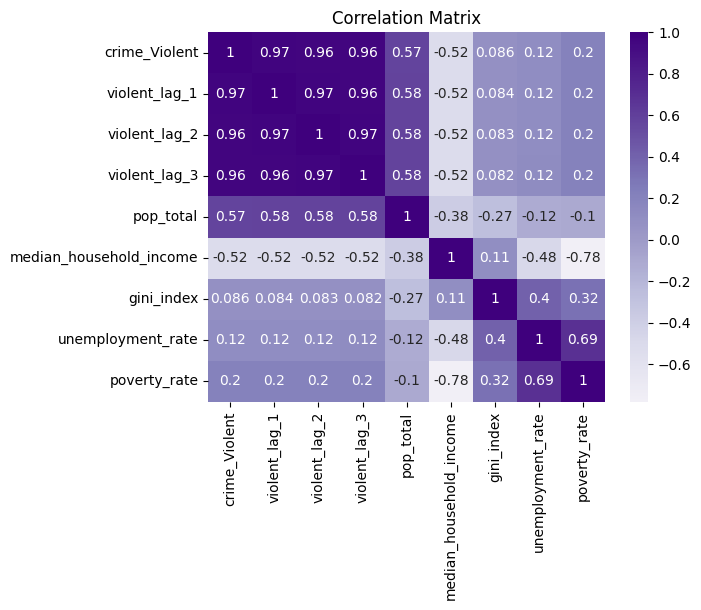

In [6]:
# Correlation
cm = incidents_train[["crime_Violent", "violent_lag_1", "violent_lag_2", "violent_lag_3", "pop_total", "median_household_income", "gini_index", "unemployment_rate", "poverty_rate"]].corr()

hm = sns.heatmap(
    cm.values,
    yticklabels=cm.index,
    xticklabels=cm.columns,
    cmap = "Purples",
    center = 0,
    annot = True
)
plt.title("Correlation Matrix")
plt.show()

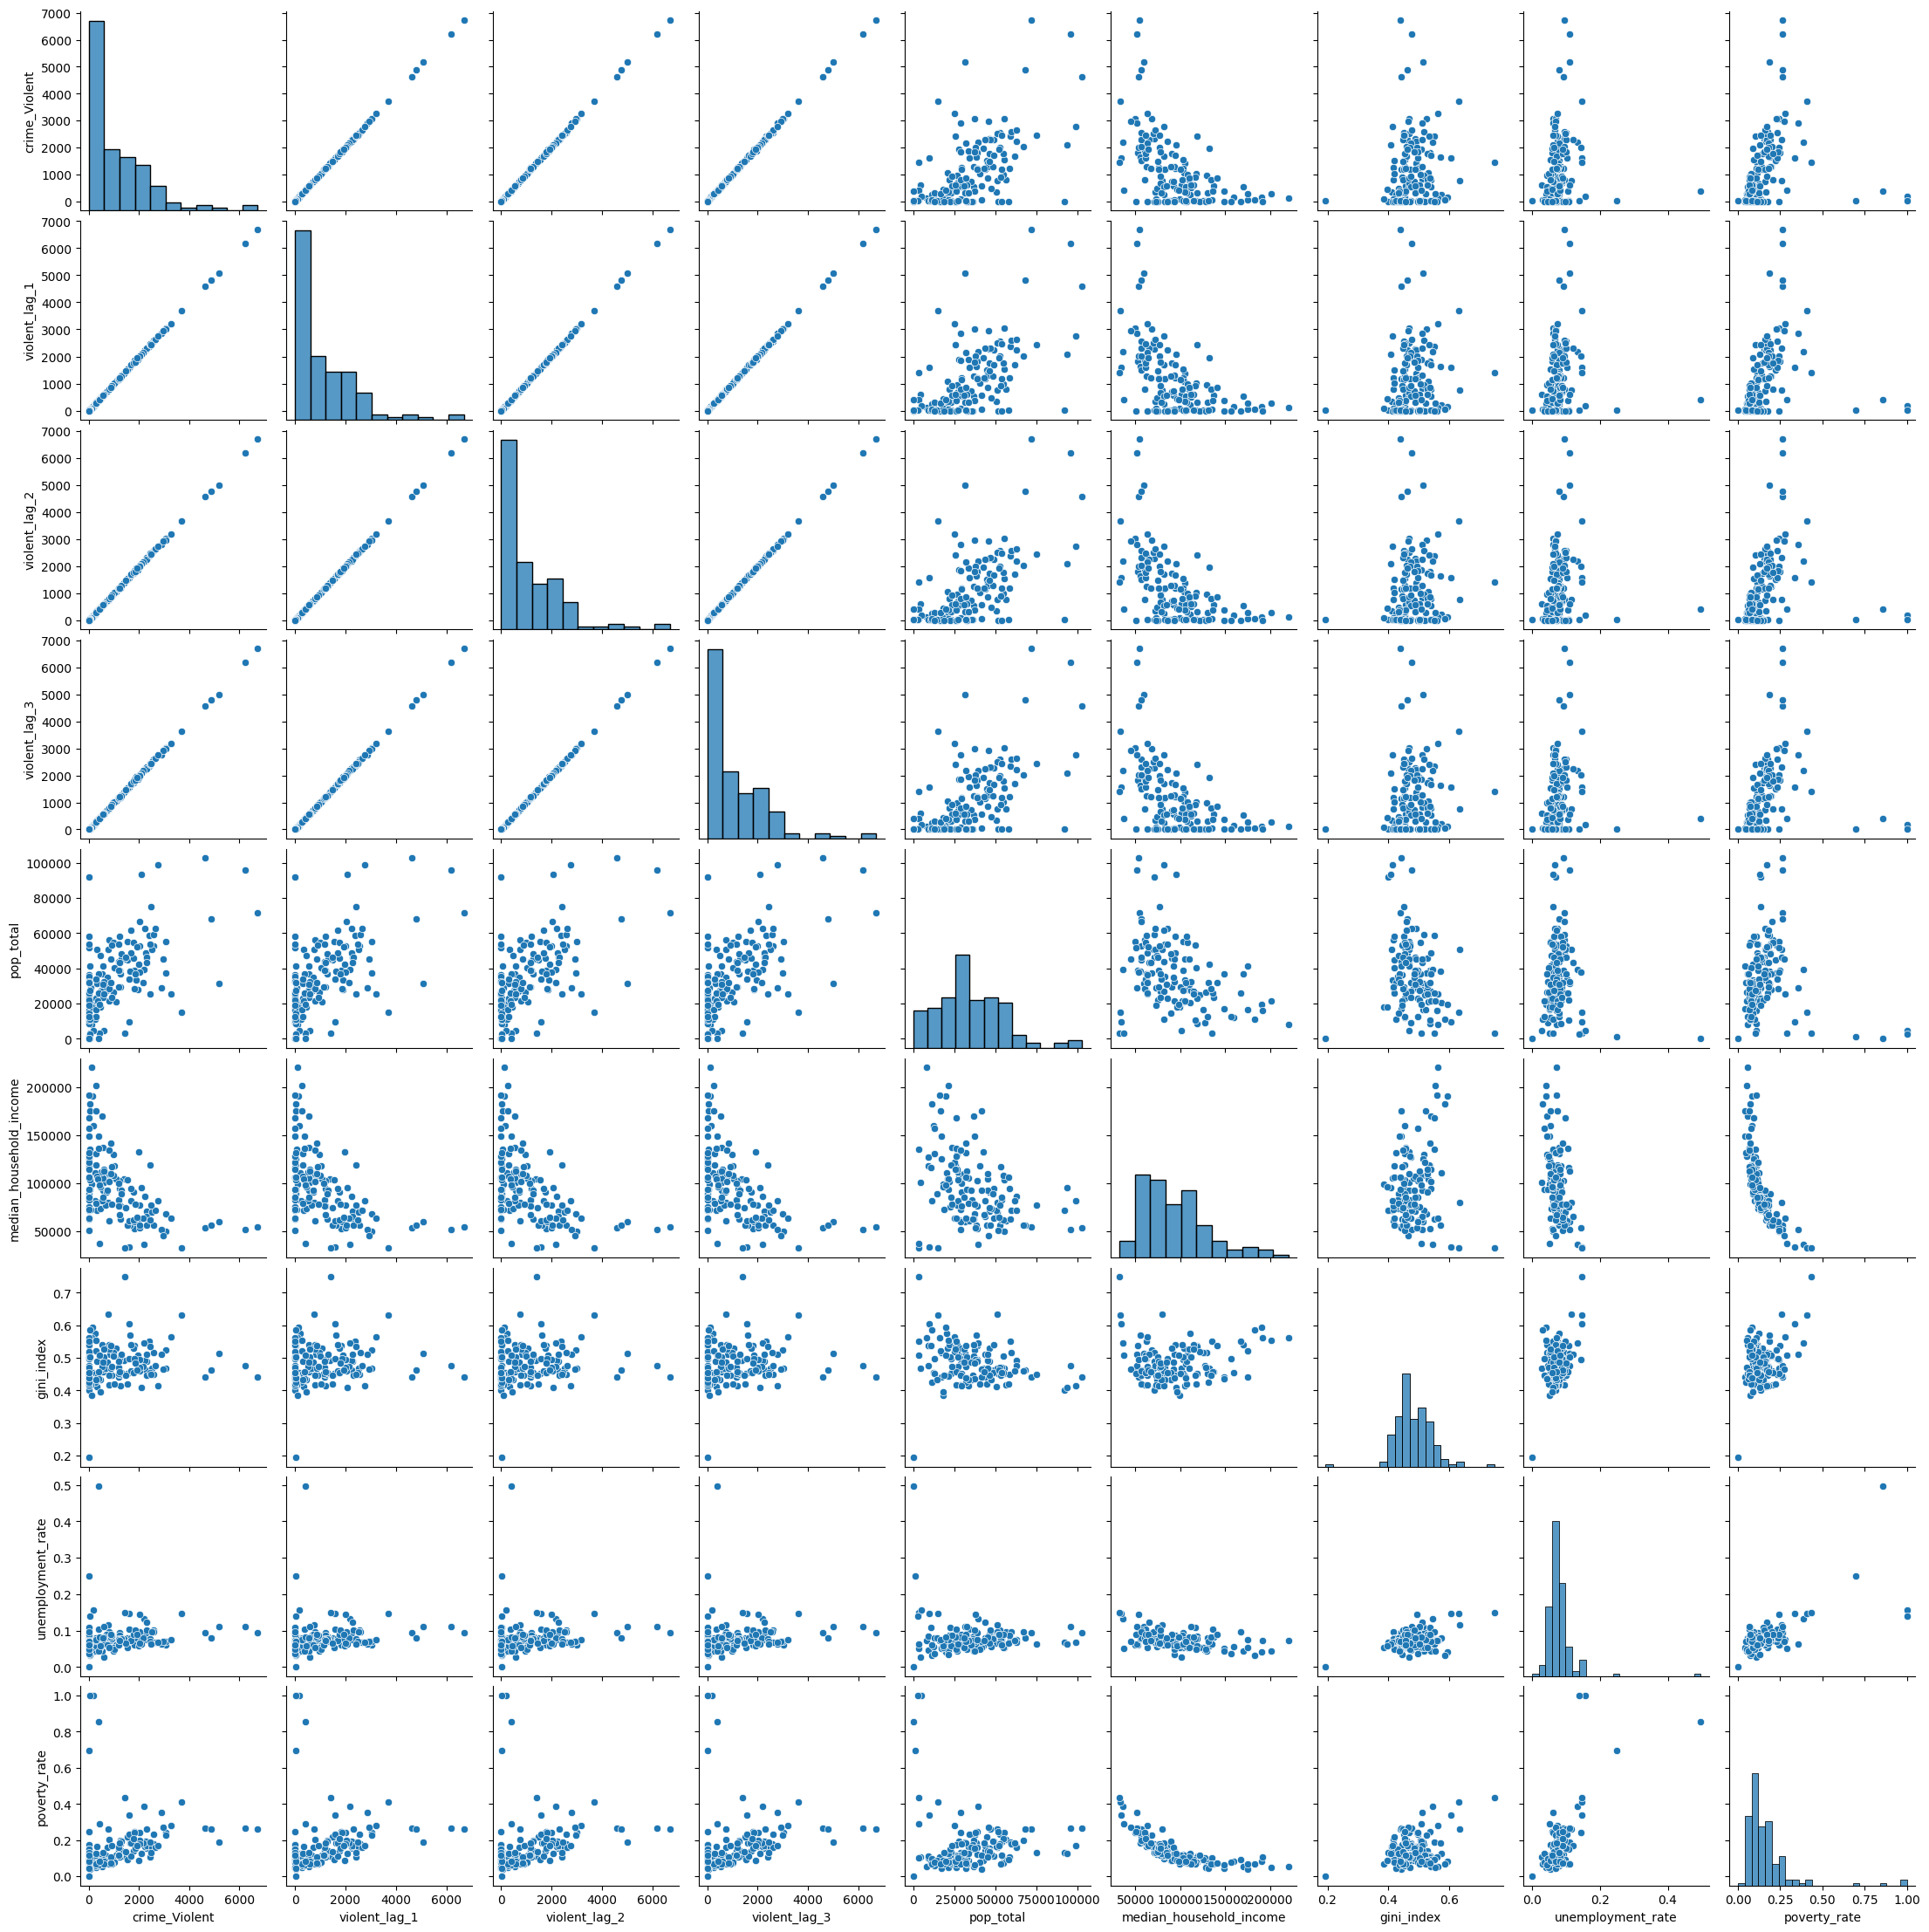

In [11]:
# Pairplot
incidents_train_agg = incidents_train.groupby(["ZCTA"]).agg({
    "crime_Violent": "sum",
    "violent_lag_1": "sum",
    "violent_lag_2": "sum",
    "violent_lag_3": "sum",
    "pop_total": "mean",
    "median_household_income": "mean",
    "gini_index": "mean",
    "unemployment_rate": "mean",
    "poverty_rate": "mean"
    }).reset_index()

sns.pairplot(incidents_train_agg.drop(["ZCTA"], axis = 1))